In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import pickle

In [2]:
from iteratexgboost import *

In [3]:
get_data()

PRC        VOL  OPENPRC   NUMTRD      RETX      actq      ancq  \
TICKER date                                                                     
ADBE   40    39.31  3671897.0    39.54  23806.0 -0.007323  4373.083  5792.628   
       41    39.83  2398125.0    39.30  17542.0  0.013228  4373.083  5792.628   
       42    40.46  2441467.0    39.74  16178.0  0.015817  4373.083  5792.628   
       43    41.46  4309693.0    40.76  27325.0  0.024716  4373.083  5792.628   
       44    41.29  2878263.0    41.47  20295.0 -0.004100  4373.083  5792.628   
...            ...        ...      ...      ...       ...       ...       ...   
ZUO    1506  16.36   550036.0    15.67      NaN  0.017413   239.841    53.402   
       1507  17.81  1092333.0    16.68      NaN  0.088631   239.841    53.402   
       1508  17.90  1011304.0    17.31      NaN  0.005053   239.841    53.402   
       1509  17.65  1141001.0    17.94      NaN -0.013966   239.841    53.402   
       1510  18.14  1125526.0    17.95      NaN  0.027762   239.841    53.402   

                  aoq        atq  aul3q  ...     RET52     RET53     RET54  \
TICKER date                              ...                                 
ADBE   40    5106.614  10165.711    0.0  ...  0.000000  0.000000  0.000000   
       41    5106.614  10165.711    0.0  ...  0.000000  0.000000  0.000000   
       42    5106.614  10165.711    0.0  ...  0.000000  0.000000  0.000000   
       43    5106.614  10165.711    0.0  ...  0.000000  0.000000  0.000000   
       44    5106.614  10165.711    0.0  ...  0.000000  0.000000  0.000000   
...               ...        ...    ...  ...       ...       ...       ...   
ZUO    1506    35.014    293.243    0.0  ... -0.014544 -0.057656 -0.007505   
       1507    35.014    293.243    0.0  ... -0.058015 -0.014544 -0.057656   
       1508    35.014    293.243    0.0  ... -0.036737 -0.058015 -0.014544   
       1509    35.014    293.243    0.0  ...  0.015143 -0.036737 -0.058015   
       1510    35.014    293.243    0.0  ...  0.093370  0.015143 -0.036737   

                RET55     RET56     RET57     RET58     RET59     RET60  \
TICKER date                                                               
ADBE   40    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       41    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       42    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       43    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       44    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...               ...       ...       ...       ...       ...       ...   
ZUO    1506  0.010427 -0.000474 -0.016768 -0.070965  0.009611  0.020508   
       1507 -0.007505  0.010427 -0.000474 -0.016768 -0.070965  0.009611   
       1508 -0.057656 -0.007505  0.010427 -0.000474 -0.016768 -0.070965   
       1509 -0.014544 -0.057656 -0.007505  0.010427 -0.000474 -0.016768   
       1510 -0.058015 -0.014544 -0.057656 -0.007505  0.010427 -0.000474   

             modrevtq  
TICKER date            
ADBE   40    6.918291  
       41    6.918291  
       42    6.918291  
       43    6.918291  
       44    6.918291  
...               ...  
ZUO    1506  4.160043  
       1507  4.160043  
       1508  4.160043  
       1509  4.160043  
       1510  4.160043  

[72563 rows x 90 columns]

In [6]:
skip = 160
forward_values = list(range(skip, ONE_YEAR, skip))
if ONE_YEAR not in forward_values:
    forward_values.append(ONE_YEAR)

file_prefix = "models2/iterate2_{}".format(skip)
print(file_prefix)

models2/iterate2_160


In [5]:
iterated_model(forward_values, file_prefix)

72563it [00:09, 7891.79it/s]
/home/shashvat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


0.49065820718127584
2.0146993739678525


72563it [00:08, 8248.97it/s]
/home/shashvat/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


0.5321651719407127
2.074036107985766


In [7]:
models = load_models(forward_values, file_prefix)
print("median: ", evaluate_model(ONE_YEAR, models))

72563it [00:08, 8432.24it/s]


median:  1.1476218082164797


In [8]:
print_test_model(ONE_YEAR, models, 100)

72563it [00:08, 8737.30it/s]


revenue predicted diff-factor
[37.268] [35.25064471] [1.05722889]
[178.712] [153.29482147] [1.16580585]
[34.612] [36.24618223] [0.95491436]
[47.444] [50.99258709] [0.93040975]
[2323.] [2535.44572605] [0.91620971]
[95.87] [108.73165804] [0.88171193]
[47.443] [51.41044228] [0.92282809]
[2419.] [2463.20801375] [0.98205267]
[2667.] [2496.72854667] [1.06819782]
[3136.] [3111.59694704] [1.00784261]
[167.966] [171.52241307] [0.97926561]
[71.782] [334.55700999] [0.21455835]
[95.87] [108.04392667] [0.88732429]
[52.409] [49.80155158] [1.05235677]
[47.727] [50.35581543] [0.9477952]
[2137.] [2310.23851759] [0.92501271]
[612.] [678.73883338] [0.90167229]
[211.964] [190.51391341] [1.11259066]
[557.8] [560.11212282] [0.99587204]
[489.7] [474.84124007] [1.03129206]
[167.966] [171.52241307] [0.97926561]
[2667.] [2496.72854667] [1.06819782]
[285.65] [269.24913345] [1.06091335]
[191.722] [199.61531075] [0.96045739]
[2099.] [2138.18778839] [0.98167243]
[112.862] [141.18401415] [0.79939645]
[2323.] [2535.4

72563it [00:08, 8470.49it/s]


revenue predicted diff-factor


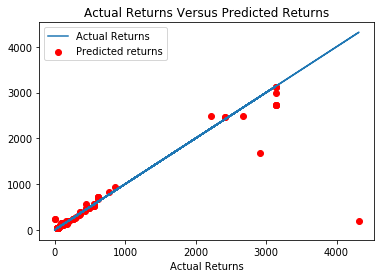

In [9]:
graph_model(ONE_YEAR, models, 100)